<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/10%20Generative%20Adversarial%20Network/Conditional%20GAN/conditional_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conditional Generative Adversarial Network


The conditional generative adversarial network, or cGAN for short, is a type of GAN that involves the conditional generation of images by a generator model. Image generation can be conditional on a class label, if available, allowing the targeted generated of images of a given type.

In [1]:
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Conditional%20GAN/saved_model/cgan_discriminator.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Conditional%20GAN/saved_model/cgan_generator.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Conditional%20GAN/saved_model/cgan_discriminator_weights.hdf5
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Conditional%20GAN/saved_model/cgan_generator_weights.hdf5

--2019-09-04 15:32:02--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Conditional%20GAN/saved_model/cgan_discriminator.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4263 (4.2K) [text/plain]
Saving to: ‘cgan_discriminator.json’

cgan_discriminator. 100%[===================>]   4.16K  --.-KB/s    in 0s      

2019-09-04 15:32:02 (81.0 MB/s) - ‘cgan_discriminator.json’ saved [4263/4263]

--2019-09-04 15:32:03--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Conditional%20GAN/saved_model/cgan_generator.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to r

In [3]:
!ls

cgan_discriminator.json		 cgan_generator.json	      sample_data
cgan_discriminator_weights.hdf5  cgan_generator_weights.hdf5


In [0]:
def load_model(model_name):
    model_path = "%s.json" % model_name
    weights_path = "%s_weights.hdf5" % model_name
    
    
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weights_path)
    
    return loaded_model

def sample_images():
    r, c = 2, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    sampled_labels = np.arange(0, 10).reshape(-1, 1)

    gen_imgs = generator.predict([noise, sampled_labels])

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')
            axs[i,j].set_title("Digit: %d" % sampled_labels[cnt])
            axs[i,j].axis('off')
            cnt += 1
    plt.show()

In [0]:
#Load saved models
generator = load_model("cgan_generator")
#discriminator = load_model("discriminator")


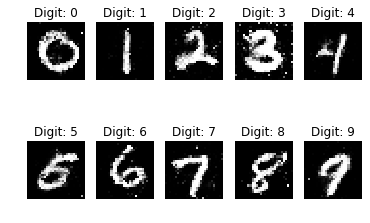

In [11]:
sample_images()        